In [1]:
# tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# data
from neuralforecast.utils import AirPassengersDF
# forecast
from neuralforecast import NeuralForecast
# models
from neuralforecast.models import NBEATS, NHITS, RNN, LSTM

import warnings
warnings.filterwarnings("ignore")

import torch
torch.set_float32_matmul_precision('medium')

# data

In [2]:
# Split data and declare panel dataset
Y_df = AirPassengersDF
Y_train_df = Y_df[Y_df.ds <= "1959-12-31"]
Y_test_df = Y_df[Y_df.ds > "1959-12-31"]

print(Y_df.head(), "\n")
print(Y_df.shape, "\n")
print(Y_df["unique_id"].value_counts(), "\n")
print(Y_train_df.shape, "\n")
print(Y_test_df.shape, "\n")

   unique_id         ds      y
0        1.0 1949-01-31  112.0
1        1.0 1949-02-28  118.0
2        1.0 1949-03-31  132.0
3        1.0 1949-04-30  129.0
4        1.0 1949-05-31  121.0 

(144, 3) 

unique_id
1.0    144
Name: count, dtype: int64 

(132, 3) 

(12, 3) 



In [3]:
Y_train_df.head()

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


In [4]:
Y_test_df.head()

,unique_id,ds,y
132,1.0,1960-01-31,417.0
133,1.0,1960-02-29,391.0
134,1.0,1960-03-31,419.0
135,1.0,1960-04-30,461.0
136,1.0,1960-05-31,472.0


# model fit

In [5]:
# forecast length
horizon = len(Y_test_df)

# model
nf = NeuralForecast(
    models = [
        LSTM(
            h = horizon, 
            max_steps = 500, 
            scaler_type = "standard",
            encoder_hidden_size = 64, 
            decoder_hidden_size = 64
        ),
        NBEATS(
            input_size = 2 * horizon, 
            h = horizon, 
            max_steps = 50
        ),
        NHITS(
            input_size = 2 * horizon, 
            h = horizon, 
            max_steps = 100, 
            n_freq_downsample = [2, 1, 1]
        ),
    ], 
    freq = "M"
)

# model training
nf.fit(df = Y_train_df)

Seed set to 1
Seed set to 1
Seed set to 1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 50.4 K | train
4 | context_adapter | Linear        | 7.8 K  | train
5 | mlp_decoder     | MLP           | 769    | train
----------------------------------------------------------
59.0 K    Trainable params
0         Non-trainable params
59.0 K    Total params
0.236     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                  | 0/? [00:…

Training: |                                                                                         | 0/? [00:…

Validation: |                                                                                       | 0/? [00:…

Validation: |                                                                                       | 0/? [00:…

Validation: |                                                                                       | 0/? [00:…

Validation: |                                                                                       | 0/? [00:…

Validation: |                                                                                       | 0/? [00:…

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
900       Non-trainable params
2.4 M     Total params
9.789     Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                  | 0/? [00:…

Training: |                                                                                         | 0/? [00:…

Validation: |                                                                                       | 0/? [00:…

`Trainer.fit` stopped: `max_steps=50` reached.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.769     Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                  | 0/? [00:…

Training: |                                                                                         | 0/? [00:…

Validation: |                                                                                       | 0/? [00:…

`Trainer.fit` stopped: `max_steps=100` reached.


# model predict

In [6]:
Y_hat_df = nf.predict().reset_index()
Y_hat_df

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                       | 0/? [00:…

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                       | 0/? [00:…

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                       | 0/? [00:…

,unique_id,ds,LSTM,NBEATS,NHITS
0,1.0,1960-01-31,414.258728,425.104950,422.867065
1,1.0,1960-02-29,439.354156,441.126190,433.847229
2,1.0,1960-03-31,423.180756,453.357208,461.176483
3,1.0,1960-04-30,422.524536,460.131378,462.637024
4,1.0,1960-05-31,449.128143,503.365540,476.654327
5,1.0,1960-06-30,515.484558,574.232422,550.436096
6,1.0,1960-07-31,588.542664,628.103027,629.343567
7,1.0,1960-08-31,591.223755,620.626343,634.283386
8,1.0,1960-09-30,517.301208,552.786133,546.299805
9,1.0,1960-10-31,454.927399,489.251495,466.182220


# plot_predictions

In [7]:
# test and predictions data
Y_hat_df = Y_test_df.merge(Y_hat_df, how = "left", on = ["unique_id", "ds"])
Y_hat_df

,unique_id,ds,y,LSTM,NBEATS,NHITS
0,1.0,1960-01-31,417.0,414.258728,425.104950,422.867065
1,1.0,1960-02-29,391.0,439.354156,441.126190,433.847229
2,1.0,1960-03-31,419.0,423.180756,453.357208,461.176483
3,1.0,1960-04-30,461.0,422.524536,460.131378,462.637024
4,1.0,1960-05-31,472.0,449.128143,503.365540,476.654327
5,1.0,1960-06-30,535.0,515.484558,574.232422,550.436096
6,1.0,1960-07-31,622.0,588.542664,628.103027,629.343567
7,1.0,1960-08-31,606.0,591.223755,620.626343,634.283386
8,1.0,1960-09-30,508.0,517.301208,552.786133,546.299805
9,1.0,1960-10-31,461.0,454.927399,489.251495,466.182220


In [8]:
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index("ds")
plot_df.head(13)

,unique_id,y,LSTM,NBEATS,NHITS
ds,,,,,
1949-01-31,1.0,112.0,NaN,NaN,NaN
1949-02-28,1.0,118.0,NaN,NaN,NaN
1949-03-31,1.0,132.0,NaN,NaN,NaN
1949-04-30,1.0,129.0,NaN,NaN,NaN
1949-05-31,1.0,121.0,NaN,NaN,NaN
1949-06-30,1.0,135.0,NaN,NaN,NaN
1949-07-31,1.0,148.0,NaN,NaN,NaN
1949-08-31,1.0,148.0,NaN,NaN,NaN
1949-09-30,1.0,136.0,NaN,NaN,NaN


In [9]:
plot_df.tail(13)

,unique_id,y,LSTM,NBEATS,NHITS
ds,,,,,
1959-12-31,1.0,405.0,NaN,NaN,NaN
1960-01-31,1.0,417.0,414.258728,425.104950,422.867065
1960-02-29,1.0,391.0,439.354156,441.126190,433.847229
1960-03-31,1.0,419.0,423.180756,453.357208,461.176483
1960-04-30,1.0,461.0,422.524536,460.131378,462.637024
1960-05-31,1.0,472.0,449.128143,503.365540,476.654327
1960-06-30,1.0,535.0,515.484558,574.232422,550.436096
1960-07-31,1.0,622.0,588.542664,628.103027,629.343567
1960-08-31,1.0,606.0,591.223755,620.626343,634.283386


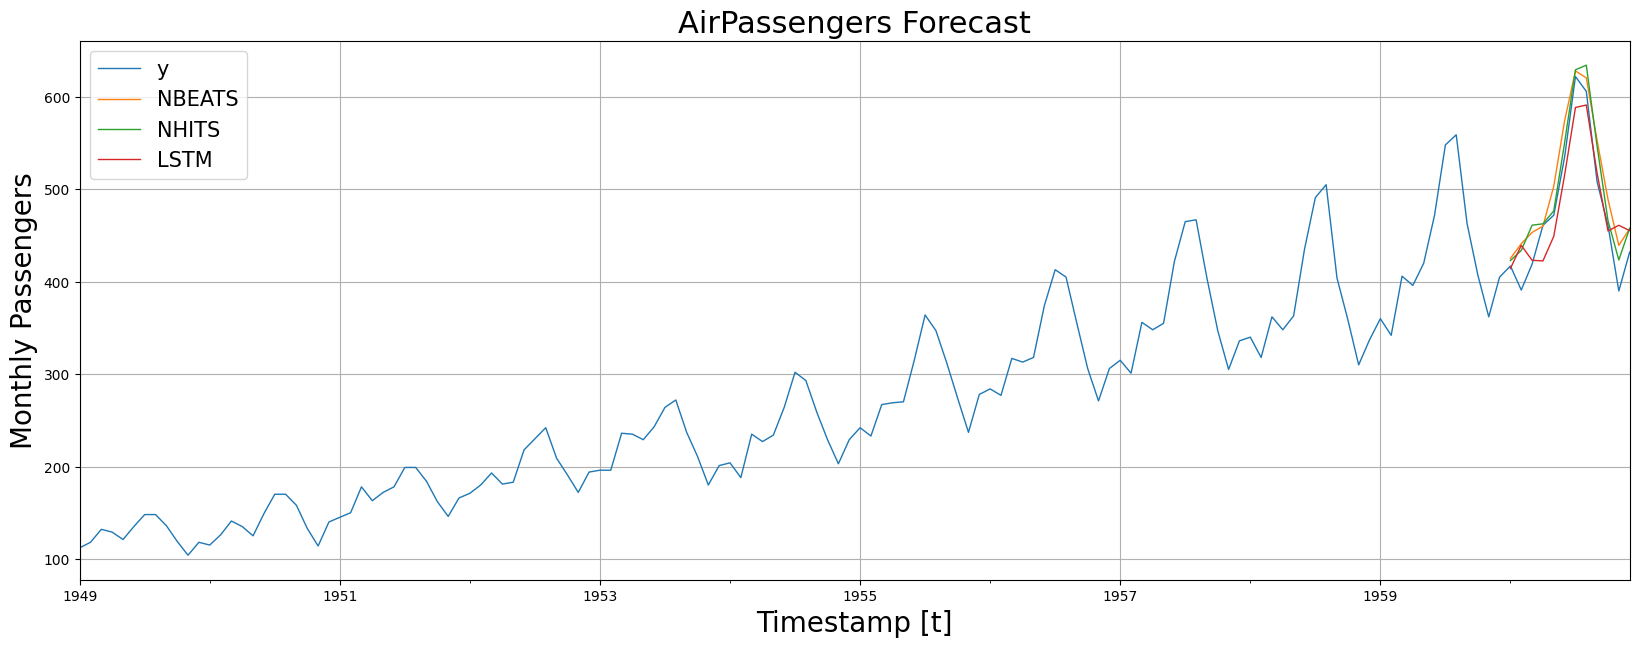

In [10]:
# plot
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df[["y", "NBEATS", "NHITS", "LSTM"]].plot(ax = ax, linewidth = 1.0)
ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()